In [1]:
import pandas as pd
import numpy as np

# Load training data obtained from C++ program

In [42]:
ok = pd.read_csv('./training-data/kernun-data2.csv')
phishtank = pd.read_csv('./training-data/phishtank-data2.csv')
openphish = pd.read_csv('./training-data/openphish-data2.csv')
bad = pd.concat([phishtank, openphish], sort=True)
bad.reset_index(drop=True, inplace=True)
ok.sort_index(axis=1, inplace=True)


# Drop columns which were used for tuning of feature value
# Take only 10k samples from data size

In [7]:
to_drop = ['url', 'input_tag_value', 'form_handler_value', 'invisible_iframe_value', 'popup_window_value', 'missleading_link_value', 'dns_created_value', 'dns_updated_value', 'ssl_created_value', 'ssl_expire_value', 'asn_value']

In [15]:
ok_input = ok.sample(10000)
ok_input.drop(axis=1, labels=to_drop, inplace=True)
ok_input.reset_index(drop=True, inplace=True)
ok_input

,ahref_link,asn,csp,disable_rightclick,dns_a_record,dns_created,dns_updated,dnssec,domain_count,extra_https,...,src_link,ssl_created,ssl_expire,ssl_subject,url_length,user_info,www_prefix,x_content_type,x_frame,xss_protection
0,0.000000,0.000000,1,0,0,0.0,0.0,0,0.05,0,...,0.000000,0.000000,0.000000,1,0.585034,0,0,1,1,1
1,0.180328,0.000000,1,0,0,0.0,0.0,0,0.05,0,...,0.000000,0.000000,0.000000,1,0.346939,0,0,1,1,1
2,0.248619,0.000000,1,0,0,0.0,0.0,0,0.05,0,...,1.000000,0.000000,0.000000,1,0.095238,0,0,1,1,1
3,0.000000,0.000000,1,0,0,0.0,0.0,1,0.05,0,...,0.000000,0.000000,0.000000,1,1.000000,0,0,1,1,1
4,0.049383,0.000000,1,0,0,0.0,0.0,0,0.05,0,...,0.000000,0.000000,0.000000,1,0.156463,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,0.000000,1,0,0,0.0,0.0,0,0.05,0,...,0.000000,0.000000,0.000000,1,0.156463,0,0,1,1,1
9996,0.000000,0.000000,1,0,0,0.0,0.0,0,0.05,0,...,0.000000,0.462172,0.837057,1,0.659864,0,0,0,1,1
9997,0.289963,0.013647,1,0,0,0.0,0.0,1,0.05,0,...,0.512195,0.483380,0.524476,0,0.414966,0,0,1,1,1
9998,0.000000,0.000000,1,0,0,0.0,0.0,1,0.10,0,...,1.000000,0.000000,0.000000,1,0.224490,0,0,1,1,1


In [18]:
bad_input = bad.sample(10000)
bad_input.drop(axis=1, labels=to_drop, inplace=True)
bad_input.reset_index(drop=True, inplace=True)
bad_input

,ahref_link,asn,csp,disable_rightclick,dns_a_record,dns_created,dns_updated,dnssec,domain_count,extra_https,...,src_link,ssl_created,ssl_expire,ssl_subject,url_length,user_info,www_prefix,x_content_type,x_frame,xss_protection
0,0.0,0.000000,1.0,0,0.0,0.000000,0.000000,1.0,0.05,0.0,...,0.0,0.000000,0.000000,1.0,0.244898,0.0,0.0,1.0,1.0,1.0
1,0.0,0.952184,1.0,0,0.0,0.000000,0.000000,0.0,0.05,0.0,...,0.0,0.000000,0.000000,1.0,0.197279,0.0,0.0,1.0,1.0,1.0
2,1.0,0.820930,1.0,0,0.0,0.000000,0.000000,1.0,0.05,0.0,...,0.0,0.000000,0.000000,1.0,0.190476,0.0,0.0,1.0,1.0,1.0
3,1.0,0.548231,1.0,0,0.0,0.000000,0.000000,0.0,0.00,0.0,...,0.0,0.476783,0.563998,1.0,0.231293,0.0,0.0,1.0,1.0,1.0
4,0.0,0.000000,1.0,0,0.0,0.000000,0.000000,1.0,0.05,0.0,...,0.0,0.000000,0.000000,1.0,0.530612,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.000000,1.0,0,0.0,0.547119,0.998919,1.0,0.00,0.0,...,0.0,0.000000,0.000000,1.0,0.380952,0.0,0.0,1.0,1.0,1.0
9996,0.0,0.548231,1.0,0,0.0,0.863930,0.971371,0.0,0.00,0.0,...,0.0,0.000000,0.000000,1.0,0.319728,0.0,0.0,0.0,1.0,1.0
9997,1.0,1.000000,1.0,0,0.0,0.000000,0.974814,1.0,0.00,0.0,...,0.0,0.000000,0.000000,1.0,0.523810,0.0,0.0,1.0,1.0,1.0
9998,1.0,0.279363,1.0,0,0.0,0.000000,0.000000,1.0,0.05,0.0,...,1.0,0.485699,0.524055,1.0,0.462585,0.0,0.0,0.0,0.0,0.0


# Create training data from benign and phishing data

In [21]:
data = ok_input.append(bad_input)
data.reset_index(drop=True, inplace=True)
data

,ahref_link,asn,csp,disable_rightclick,dns_a_record,dns_created,dns_updated,dnssec,domain_count,extra_https,...,src_link,ssl_created,ssl_expire,ssl_subject,url_length,user_info,www_prefix,x_content_type,x_frame,xss_protection
0,0.000000,0.000000,1.0,0,0.0,0.000000,0.000000,0.0,0.05,0.0,...,0.0,0.000000,0.000000,1.0,0.585034,0.0,0.0,1.0,1.0,1.0
1,0.180328,0.000000,1.0,0,0.0,0.000000,0.000000,0.0,0.05,0.0,...,0.0,0.000000,0.000000,1.0,0.346939,0.0,0.0,1.0,1.0,1.0
2,0.248619,0.000000,1.0,0,0.0,0.000000,0.000000,0.0,0.05,0.0,...,1.0,0.000000,0.000000,1.0,0.095238,0.0,0.0,1.0,1.0,1.0
3,0.000000,0.000000,1.0,0,0.0,0.000000,0.000000,1.0,0.05,0.0,...,0.0,0.000000,0.000000,1.0,1.000000,0.0,0.0,1.0,1.0,1.0
4,0.049383,0.000000,1.0,0,0.0,0.000000,0.000000,0.0,0.05,0.0,...,0.0,0.000000,0.000000,1.0,0.156463,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.000000,0.000000,1.0,0,0.0,0.547119,0.998919,1.0,0.00,0.0,...,0.0,0.000000,0.000000,1.0,0.380952,0.0,0.0,1.0,1.0,1.0
19996,0.000000,0.548231,1.0,0,0.0,0.863930,0.971371,0.0,0.00,0.0,...,0.0,0.000000,0.000000,1.0,0.319728,0.0,0.0,0.0,1.0,1.0
19997,1.000000,1.000000,1.0,0,0.0,0.000000,0.974814,1.0,0.00,0.0,...,0.0,0.000000,0.000000,1.0,0.523810,0.0,0.0,1.0,1.0,1.0
19998,1.000000,0.279363,1.0,0,0.0,0.000000,0.000000,1.0,0.05,0.0,...,1.0,0.485699,0.524055,1.0,0.462585,0.0,0.0,0.0,0.0,0.0


# Split the original data for training data and test data

In [85]:
from sklearn.model_selection import train_test_split
X = data.drop('label', axis=1).to_numpy()
y = data.label.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)
cols = data.drop('label', axis=1).columns


https://machinelearningmastery.com/feature-selection-machine-learning-python/


# SelectKBest algorithm

In [107]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# feature extraction

np.set_printoptions(precision=3, suppress=True)

print("Find best features by SelectKBest method")

test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X_train, y_train)

scores_1 = pd.DataFrame({'col': cols, 'score': fit.scores_})
scores_1.sort_values('score', ascending=False)

Find best features by SelectKBest method


,col,score
1,asn,3121.741069
33,similar_domain,1448.847404
15,gtld,1174.204468
5,dns_created,1052.032867
6,dns_updated,1048.454459
7,dnssec,1007.085428
10,favicon_link,863.131287
39,src_link,511.940852
37,spec_chars_query,447.254598
29,query_length,282.306806


1 	asn 	3121.741069
33 	similar_domain 	1448.847404
15 	gtld 	1174.204468
5 	dns_created 	1052.032867
6 	dns_updated 	1048.454459
7 	dnssec 	1007.085428
10 	favicon_link 	863.131287
39 	src_link 	511.940852
37 	spec_chars_query 	447.254598
29 	query_length 	282.306806
0 	ahref_link 	265.736901
38 	spec_keywords 	219.573613
23 	missleading_link 	81.141808
26 	path_length 	72.224157
32 	shortening_service 	63.602805
12 	four_numbers 	53.222984

# Recursive feature elimination - LogisticRegression lbfgs
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE

In [108]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000, verbose=True)
rfe = RFE(model, 1, verbose=True)
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

scores_2 = pd.DataFrame({'col': cols, 'score': fit.ranking_})
scores_2.sort_values('score')

Fitting estimator with 49 features.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 48 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 47 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 46 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 45 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 44 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 43 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 42 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 41 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 40 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 39 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 38 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 37 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 36 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 35 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 34 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 33 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 32 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 31 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 30 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 29 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 28 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 27 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 26 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 25 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 24 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 23 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 22 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 21 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 20 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 19 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 18 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 17 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 16 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 15 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 14 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 13 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 12 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 11 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


Fitting estimator with 10 features.
Fitting estimator with 9 features.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 8 features.
Fitting estimator with 7 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 6 features.
Fitting estimator with 5 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 4 features.
Fitting estimator with 3 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 2 features.
Num Features: 1
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False]
Feature Ranking: [27  2 13 33  8 30 12 19 20 44 16 40 41 35 34 10 11 23 18 29 25 45  9  3
 38 22  7 24 37 39 42 31 15  4 17 21 32 26  1  5 28 14 43  6 49 36 47 46
 48]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


KeyError: 'scores'

38 	spec_keywords 	1
1 	asn 	2
23 	missleading_link 	3
33 	similar_domain 	4
39 	src_link 	5
43 	url_length 	6
26 	path_length 	7
4 	dns_a_record 	8
22 	ip_address 	9
15 	gtld 	10
16 	host_length 	11
6 	dns_updated 	12
2 	csp 	13
41 	ssl_expire 	14
32 	shortening_service 	15

# Recursive feature elimination - LogisticRegression liblinear


In [114]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', max_iter=1000, verbose=True)
rfe = RFE(model, 1, verbose=True)
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

scores_3 = pd.DataFrame({'col': cols, 'score': fit.ranking_})
scores_3.sort_values('score')

Fitting estimator with 49 features.
[LibLinear]Fitting estimator with 48 features.
[LibLinear]Fitting estimator with 47 features.
[LibLinear]Fitting estimator with 46 features.
[LibLinear]Fitting estimator with 45 features.
[LibLinear]Fitting estimator with 44 features.
[LibLinear]Fitting estimator with 43 features.
[LibLinear]Fitting estimator with 42 features.
[LibLinear]Fitting estimator with 41 features.
[LibLinear]Fitting estimator with 40 features.
[LibLinear]Fitting estimator with 39 features.
[LibLinear]Fitting estimator with 38 features.
[LibLinear]Fitting estimator with 37 features.
[LibLinear]Fitting estimator with 36 features.
[LibLinear]Fitting estimator with 35 features.
[LibLinear]Fitting estimator with 34 features.
[LibLinear]Fitting estimator with 33 features.
[LibLinear]Fitting estimator with 32 features.
[LibLinear]Fitting estimator with 31 features.
[LibLinear]Fitting estimator with 30 features.
[LibLinear]Fitting estimator with 29 features.
[LibLinear]Fitting estim

,col,score
38,spec_keywords,1
1,asn,2
23,missleading_link,3
33,similar_domain,4
43,url_length,5
26,path_length,6
39,src_link,7
4,dns_a_record,8
22,ip_address,9
15,gtld,10


# Recursive feature elimination - LinearSVC

In [115]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

model = LinearSVC(random_state=0, tol=1e-5, verbose=True)
rfe = RFE(model, 1, verbose=True)
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

scores_4 = pd.DataFrame({'col': cols, 'score': fit.ranking_})
scores_4.sort_values('score')

Fitting estimator with 49 features.
[LibLinear]Fitting estimator with 48 features.
[LibLinear]Fitting estimator with 47 features.
[LibLinear]Fitting estimator with 46 features.
[LibLinear]Fitting estimator with 45 features.
[LibLinear]Fitting estimator with 44 features.
[LibLinear]Fitting estimator with 43 features.
[LibLinear]Fitting estimator with 42 features.
[LibLinear]Fitting estimator with 41 features.
[LibLinear]Fitting estimator with 40 features.
[LibLinear]Fitting estimator with 39 features.
[LibLinear]Fitting estimator with 38 features.
[LibLinear]Fitting estimator with 37 features.
[LibLinear]Fitting estimator with 36 features.
[LibLinear]Fitting estimator with 35 features.
[LibLinear]Fitting estimator with 34 features.
[LibLinear]Fitting estimator with 33 features.
[LibLinear]Fitting estimator with 32 features.
[LibLinear]Fitting estimator with 31 features.
[LibLinear]Fitting estimator with 30 features.
[LibLinear]Fitting estimator with 29 features.
[LibLinear]Fitting estim

,col,score
38,spec_keywords,1
34,spec_chars_fragment,2
1,asn,3
4,dns_a_record,4
22,ip_address,5
33,similar_domain,6
23,missleading_link,7
39,src_link,8
43,url_length,9
26,path_length,10


# Recursive feature elimination - Perceptron

In [116]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Perceptron

model = Perceptron(tol=1e-3, random_state=0, verbose=True)
rfe = RFE(model, 1, verbose=True)
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

scores_5 = pd.DataFrame({'col': cols, 'score': fit.ranking_})
scores_5.sort_values('score')

Fitting estimator with 49 features.
-- Epoch 1
Norm: 42.47, NNZs: 40, Bias: -14.000000, T: 15000, Avg. loss: 0.949912
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 52.64, NNZs: 46, Bias: -12.000000, T: 30000, Avg. loss: 0.901637
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 60.62, NNZs: 46, Bias: -12.000000, T: 45000, Avg. loss: 0.903584
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 63.35, NNZs: 45, Bias: -14.000000, T: 60000, Avg. loss: 0.909320
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 70.81, NNZs: 45, Bias: -12.000000, T: 75000, Avg. loss: 0.906763
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 75.75, NNZs: 45, Bias: -13.000000, T: 90000, Avg. loss: 0.902665
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 77.61, NNZs: 44, Bias: -17.000000, T: 105000, Avg. loss: 0.920788
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.04 seconds
Fitting estimator with 48 features.
-- Epoch 1
Norm: 42.47, NNZs: 40, Bias: -14.000000, T: 15000, A

,col,score
38,spec_keywords,1
34,spec_chars_fragment,2
4,dns_a_record,3
1,asn,4
22,ip_address,5
6,dns_updated,6
32,shortening_service,7
13,fragment_length,8
8,domain_count,9
43,url_length,10


# Recursive feature elimination - Lasso

In [121]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
rfe = RFE(model, 1, verbose=True)
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

scores_6 = pd.DataFrame({'col': cols, 'score': fit.ranking_})
scores_6.sort_values('score')

Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 fe

,col,score
1,asn,1
48,xss_protection,2
47,x_frame,3
46,x_content_type,4
45,www_prefix,5
44,user_info,6
43,url_length,7
42,ssl_subject,8
41,ssl_expire,9
8,domain_count,10


# Recursive feature elimination - ExtraTreesClassifiier

In [276]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=100, verbose=True)
rfe = RFE(model, 1, verbose=True)
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

scores_7 = pd.DataFrame({'col': cols, 'score': fit.ranking_})
scores_7.sort_values('score')

Fitting estimator with 49 features.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 48 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 47 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 46 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 45 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 44 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 43 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 42 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 41 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 40 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 39 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 38 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 37 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 36 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 35 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 34 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 33 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 32 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 31 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 30 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 29 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 28 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 27 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 26 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 25 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 24 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 23 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 22 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 21 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 20 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 19 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 18 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 17 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 16 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 15 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 14 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 13 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 12 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 11 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 10 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 9 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 8 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 7 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 6 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 5 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 4 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 3 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 2 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


Num Features: 1
Selected Features: [False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]
Feature Ranking: [10  1 23 41 35 12  9  7 19 47 15 33 32 42 48  8  5 24 25 27 21 38 39 18
 40 34  4 37 43 22 28 45 36  2 44 20 14 16 13  6 11 17 31  3 49 46 26 29
 30]


,col,score
1,asn,1
33,similar_domain,2
43,url_length,3
26,path_length,4
16,host_length,5
39,src_link,6
7,dnssec,7
15,gtld,8
6,dns_updated,9
0,ahref_link,10


# Recursive feature elimination - RandomForestClassifier

In [141]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, verbose=True)
rfe = RFE(model, 1, verbose=True)
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

scores_8 = pd.DataFrame({'col': cols, 'score': fit.ranking_})
scores_8.sort_values('score')

Fitting estimator with 49 features.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 48 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 47 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 46 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 45 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 44 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 43 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 42 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 41 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 40 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 39 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 38 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 37 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished


Fitting estimator with 36 features.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 35 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 34 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 33 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 32 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 31 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 30 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 29 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.4s finished


Fitting estimator with 28 features.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 27 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 26 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 25 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 24 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 23 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 22 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 21 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 20 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 19 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 18 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 17 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 16 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 15 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 14 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 13 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 12 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 11 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 10 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 9 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 8 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 7 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 6 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 5 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 4 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 3 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 2 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


Num Features: 1
Selected Features: [False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]
Feature Ranking: [ 8  1 28 41 34 16  7  9 12 47 20 33 32 42 48 10  5 24 23 26 18 37 38 15
 40 35  4 36 43 17 27 45 39  2 44 22 19 21 13  6 11 14 30  3 49 46 25 29
 31]


,col,score
1,asn,1
33,similar_domain,2
43,url_length,3
26,path_length,4
16,host_length,5
39,src_link,6
6,dns_updated,7
0,ahref_link,8
7,dnssec,9
15,gtld,10


# Recursive feature elimination - DecisionTreeClassifier

In [181]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
rfe = RFE(model, 1, verbose=True)
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

scores_9 = pd.DataFrame({'col': cols, 'score': fit.ranking_})
scores_9.sort_values('score')


Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 fe

,col,score
1,asn,1
33,similar_domain,2
43,url_length,3
26,path_length,4
0,ahref_link,5
16,host_length,6
39,src_link,7
41,ssl_expire,8
7,dnssec,9
15,gtld,10


# Select From Model - Logistic Regression lgbfs

In [175]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000, verbose=True)
sfm = SelectFromModel(model, threshold='median')
fit = sfm.fit(X_train, y_train)

print("Thresholds: %d" % fit.threshold_)
# print("Selected Features: %s" % fit.support_)
# print("Feature Ranking: %s" % fit.ranking_)
# print(fit.get_support())
# print(fit.get_params())
# sfm.estimator_.coef_

scores_10 = pd.DataFrame({'col': cols, 'score': sfm.estimator_.coef_[0]})
scores_10.sort_values('score', ascending=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Thresholds: 0


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished


,col,score
38,spec_keywords,10.136039
1,asn,4.329673
16,host_length,2.567088
26,path_length,2.305207
15,gtld,1.844448
2,csp,1.782145
33,similar_domain,1.732054
32,shortening_service,1.544541
39,src_link,1.388968
6,dns_updated,1.267769


# Select From Model - LogisticRegression liblinear¶

In [182]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', max_iter=1000, verbose=True)
sfm = SelectFromModel(model, threshold='median')
fit = sfm.fit(X_train, y_train)

scores_11 = pd.DataFrame({'col': cols, 'score': sfm.estimator_.coef_[0]})
scores_11.sort_values('score', ascending=False)

[LibLinear]

,col,score
38,spec_keywords,10.145506
1,asn,4.323233
16,host_length,2.557983
26,path_length,2.314650
15,gtld,1.837557
33,similar_domain,1.730938
2,csp,1.716032
32,shortening_service,1.520536
39,src_link,1.382513
6,dns_updated,1.256843


# Select From Model  - LinearSVC

In [183]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

model = LinearSVC(random_state=0, tol=1e-5, verbose=True)
sfm = SelectFromModel(model, threshold='median')
fit = sfm.fit(X_train, y_train)

scores_12 = pd.DataFrame({'col': cols, 'score': sfm.estimator_.coef_[0]})
scores_12.sort_values('score', ascending=False)

[LibLinear]

,col,score
38,spec_keywords,5.629510
1,asn,1.339582
34,spec_chars_fragment,1.285568
4,dns_a_record,1.008859
26,path_length,0.915420
16,host_length,0.882566
32,shortening_service,0.689680
15,gtld,0.609970
2,csp,0.576814
33,similar_domain,0.558767


# Select From Model  - Perceptron

In [185]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Perceptron

model = Perceptron(tol=1e-3, random_state=0, verbose=True)
sfm = SelectFromModel(model, threshold='median')
fit = sfm.fit(X_train, y_train)

scores_13 = pd.DataFrame({'col': cols, 'score': sfm.estimator_.coef_[0]})
scores_13.sort_values('score', ascending=False)

-- Epoch 1
Norm: 42.47, NNZs: 40, Bias: -14.000000, T: 15000, Avg. loss: 0.949912
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 52.64, NNZs: 46, Bias: -12.000000, T: 30000, Avg. loss: 0.901637
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 60.62, NNZs: 46, Bias: -12.000000, T: 45000, Avg. loss: 0.903584
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 63.35, NNZs: 45, Bias: -14.000000, T: 60000, Avg. loss: 0.909320
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 70.81, NNZs: 45, Bias: -12.000000, T: 75000, Avg. loss: 0.906763
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 75.75, NNZs: 45, Bias: -13.000000, T: 90000, Avg. loss: 0.902665
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 77.61, NNZs: 44, Bias: -17.000000, T: 105000, Avg. loss: 0.920788
Total training time: 0.03 seconds.
Convergence after 7 epochs took 0.03 seconds


,col,score
38,spec_keywords,64.700000
1,asn,17.590501
4,dns_a_record,11.000000
16,host_length,10.296323
26,path_length,9.079641
15,gtld,9.000000
34,spec_chars_fragment,9.000000
32,shortening_service,8.000000
2,csp,8.000000
33,similar_domain,7.799733


# Select From Model  - Lasso

In [188]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.5)
sfm = SelectFromModel(model)
fit = sfm.fit(X_train, y_train)

scores_14 = pd.DataFrame({'col': cols, 'score': sfm.estimator_.coef_[0]})
scores_14.sort_values('score', ascending=False)

,col,score
0,ahref_link,0.0
25,old_technologies,0.0
27,popup_window,0.0
28,punycode,0.0
29,query_length,0.0
30,redirect,0.0
31,rewrite_statusbar,0.0
32,shortening_service,0.0
33,similar_domain,0.0
34,spec_chars_fragment,0.0


# Select From Model  - ExtraTreesClassifiier

In [193]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=100, verbose=True)
sfm = SelectFromModel(model, threshold='median')
fit = sfm.fit(X_train, y_train)

scores_15 = pd.DataFrame({'col': cols, 'score': sfm.estimator_.feature_importances_})
scores_15.sort_values('score', ascending=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.6s finished


,col,score
1,asn,0.234022
33,similar_domain,0.102864
7,dnssec,0.060830
15,gtld,0.055768
39,src_link,0.041074
6,dns_updated,0.037762
16,host_length,0.034442
0,ahref_link,0.030648
38,spec_keywords,0.030580
5,dns_created,0.029557


# Select From Model  - RandomForestClassifier

In [194]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, verbose=True)
sfm = SelectFromModel(model, threshold='median')
fit = sfm.fit(X_train, y_train)

scores_16 = pd.DataFrame({'col': cols, 'score': sfm.estimator_.feature_importances_})
scores_16.sort_values('score', ascending=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished


,col,score
1,asn,0.224192
33,similar_domain,0.081483
15,gtld,0.053518
39,src_link,0.049953
7,dnssec,0.048767
6,dns_updated,0.047512
16,host_length,0.044344
38,spec_keywords,0.037725
0,ahref_link,0.034935
43,url_length,0.034912


# Select From Model  - DecisionTreeClassifier

In [278]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
sfm = SelectFromModel(model, threshold='median')
fit = sfm.fit(X_train, y_train)

scores_17 = pd.DataFrame({'col': cols, 'score': sfm.estimator_.feature_importances_})
scores_17.sort_values('score', ascending=False)

,col,score
1,asn,0.398304
33,similar_domain,0.115151
39,src_link,0.055387
41,ssl_expire,0.045094
7,dnssec,0.036591
15,gtld,0.034197
43,url_length,0.033128
16,host_length,0.030376
38,spec_keywords,0.028416
0,ahref_link,0.026194


# Recursive feature elimination CV - LogisticRegression lbfgs


Fitting estimator with 49 features.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 48 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 47 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 46 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 45 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 44 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 43 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 42 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 41 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 40 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 39 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 38 features.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


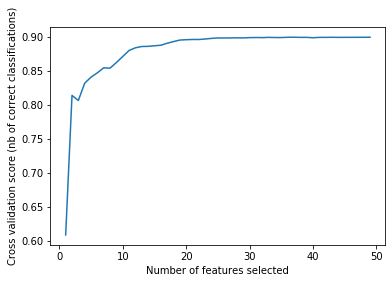

Num Features: 37
Selected Features: [ True  True  True False  True  True  True  True  True False  True False
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True False False False  True  True  True  True  True
  True  True  True  True  True  True False  True False  True False False
 False]
Feature Ranking: [ 1  1  1  6  1  1  1  1  1  4  1 10  1  1  1  1  1  1  1  1  1  1  1  1
  8  1  1  1  2 12  3  1  1  1  1  1  1  1  1  1  1  1  5  1 13  1 11  7
  9]
Grid Scores: [0.608 0.814 0.806 0.832 0.84  0.847 0.854 0.854 0.862 0.871 0.88  0.884
 0.886 0.886 0.887 0.887 0.89  0.893 0.895 0.896 0.896 0.896 0.897 0.897
 0.898 0.898 0.898 0.898 0.898 0.899 0.899 0.899 0.899 0.899 0.899 0.899
 0.899 0.899 0.899 0.898 0.899 0.899 0.899 0.899 0.899 0.899 0.899 0.899
 0.899]


,col,score
0,ahref_link,1
22,ip_address,1
23,missleading_link,1
25,old_technologies,1
26,path_length,1
27,popup_window,1
43,url_length,1
31,rewrite_statusbar,1
41,ssl_expire,1
32,shortening_service,1


In [205]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

model = LogisticRegression(solver='lbfgs', max_iter=1000, verbose=True)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5),
              scoring='accuracy', verbose=True, n_jobs=-1)
fit = rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print("Grid Scores: %s" % rfecv.grid_scores_)

scores_18 = pd.DataFrame({'col': cols, 'score': fit.ranking_})
scores_18.sort_values('score')

# Recursive feature elimination CV - LogisticRegression liblinear


Fitting estimator with 49 features.
[LibLinear]Fitting estimator with 48 features.
[LibLinear]Fitting estimator with 47 features.
[LibLinear]Fitting estimator with 46 features.
[LibLinear]Fitting estimator with 45 features.
[LibLinear]Fitting estimator with 44 features.
[LibLinear]Fitting estimator with 43 features.
[LibLinear]Fitting estimator with 42 features.
[LibLinear]Fitting estimator with 41 features.
[LibLinear][LibLinear][LibLinear]

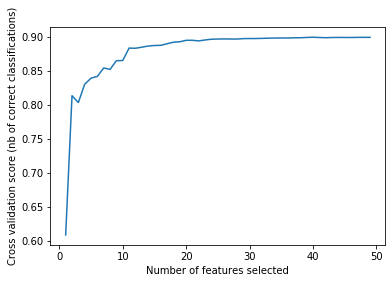

Num Features: 40
Selected Features: [ True  True  True False  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True False  True False  True False False
 False]
Feature Ranking: [ 1  1  1  2  1  1  1  1  1  1  1  7  1  1  1  1  1  1  1  1  1  1  1  1
  5  1  1  1  1  9  1  1  1  1  1  1  1  1  1  1  1  1  3  1 10  1  6  4
  8]
Grid Scores: [0.608 0.814 0.803 0.831 0.839 0.842 0.855 0.852 0.865 0.865 0.884 0.884
 0.885 0.887 0.888 0.888 0.89  0.892 0.893 0.895 0.895 0.894 0.896 0.897
 0.897 0.897 0.897 0.897 0.898 0.898 0.898 0.898 0.898 0.899 0.899 0.899
 0.899 0.899 0.9   0.9   0.899 0.899 0.899 0.9   0.899 0.899 0.9   0.9
 0.9  ]


,col,score
0,ahref_link,1
23,missleading_link,1
25,old_technologies,1
26,path_length,1
27,popup_window,1
28,punycode,1
43,url_length,1
30,redirect,1
31,rewrite_statusbar,1
32,shortening_service,1


In [206]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

model = LogisticRegression(solver='liblinear', max_iter=1000, verbose=True)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5),
              scoring='accuracy', verbose=True, n_jobs=-1)
fit = rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print("Grid Scores: %s" % rfecv.grid_scores_)

scores_19 = pd.DataFrame({'col': cols, 'score': fit.ranking_})
scores_19.sort_values('score')

# Recursive feature elimination CV - LinearSVC

Fitting estimator with 49 features.
[LibLinear]Fitting estimator with 48 features.
[LibLinear]Fitting estimator with 47 features.
[LibLinear]Fitting estimator with 46 features.
[LibLinear]Fitting estimator with 45 features.
[LibLinear]Fitting estimator with 44 features.
[LibLinear][LibLinear][LibLinear]

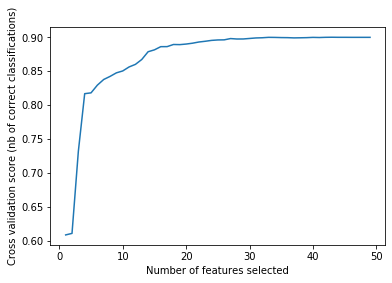

Num Features: 43
Selected Features: [ True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True False False
 False]
Feature Ranking: [1 1 1 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 7 1 4 3 5]
Grid Scores: [0.608 0.61  0.732 0.817 0.818 0.829 0.838 0.842 0.847 0.85  0.856 0.86
 0.867 0.879 0.881 0.886 0.886 0.889 0.889 0.89  0.891 0.893 0.894 0.895
 0.896 0.896 0.898 0.897 0.898 0.898 0.899 0.899 0.9   0.9   0.9   0.899
 0.899 0.899 0.899 0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9   0.9
 0.9  ]


,col,score
0,ahref_link,1
23,missleading_link,1
43,url_length,1
25,old_technologies,1
26,path_length,1
27,popup_window,1
28,punycode,1
29,query_length,1
30,redirect,1
22,ip_address,1


In [207]:
from sklearn.feature_selection import RFECV
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

model = LinearSVC(random_state=0, tol=1e-5, verbose=True)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5),
              scoring='accuracy', verbose=True, n_jobs=-1)
fit = rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print("Grid Scores: %s" % rfecv.grid_scores_)

scores_20 = pd.DataFrame({'col': cols, 'score': fit.ranking_})
scores_20.sort_values('score')

# Recursive feature elimination CV - Perceptron

Fitting estimator with 49 features.
-- Epoch 1
Norm: 41.82, NNZs: 43, Bias: -14.000000, T: 20000, Avg. loss: 0.950535
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 56.43, NNZs: 46, Bias: -13.000000, T: 40000, Avg. loss: 0.920600
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 64.94, NNZs: 46, Bias: -13.000000, T: 60000, Avg. loss: 0.915536
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 70.80, NNZs: 47, Bias: -14.000000, T: 80000, Avg. loss: 0.908831
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 75.59, NNZs: 47, Bias: -15.000000, T: 100000, Avg. loss: 0.898115
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 79.72, NNZs: 46, Bias: -13.000000, T: 120000, Avg. loss: 0.918455
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 80.73, NNZs: 46, Bias: -15.000000, T: 140000, Avg. loss: 0.913764
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 84.51, NNZs: 45, Bias: -14.000000, T: 160000, Avg. loss: 0.908591
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 85.07, 

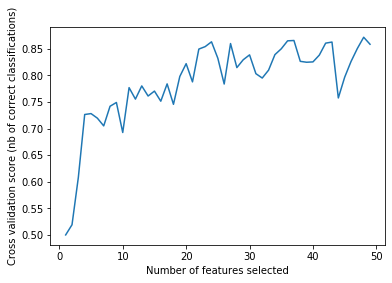

Num Features: 48
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
Grid Scores: [0.5   0.519 0.608 0.726 0.728 0.72  0.705 0.742 0.749 0.693 0.777 0.755
 0.78  0.761 0.77  0.751 0.784 0.746 0.798 0.822 0.788 0.849 0.854 0.863
 0.832 0.784 0.86  0.815 0.829 0.839 0.803 0.795 0.81  0.839 0.85  0.865
 0.866 0.826 0.825 0.825 0.838 0.861 0.863 0.758 0.796 0.826 0.851 0.872
 0.858]


,col,score
21,ip_address,-16.000000
22,missleading_link,-12.080000
42,url_length,-7.305945
24,old_technologies,-6.000000
36,spec_chars_query,-5.384631
8,domain_count,-4.800000
26,popup_window,-4.200000
27,punycode,-4.000000
17,hsts,-4.000000
18,https_used,-3.000000


In [220]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Perceptron
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

model = Perceptron(tol=1e-3, random_state=0, verbose=True)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5),
              scoring='accuracy', verbose=True, n_jobs=-1)
fit = rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print("Grid Scores: %s" % rfecv.grid_scores_)

scores_21 = pd.DataFrame({'col': cols[fit.support_], 'score': rfecv.estimator_.coef_[0]})
scores_21.sort_values('score')

# Recursive feature elimination  CV - Lasso

CANT USE BECAUSE LASSO IS REGRESSION NOT CLASSIFICATION

In [222]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Lasso
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

model = Lasso(alpha=0.1)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5),
              scoring='accuracy', verbose=True, n_jobs=3)
fit = rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print("Grid Scores: %s" % rfecv.grid_scores_)

scores_22 = pd.DataFrame({'col': cols[fit.support_], 'score': rfecv.estimator_.coef_[0]})
scores_22.sort_values('score')

ValueError: Classification metrics can't handle a mix of binary and continuous targets

# Recursive feature elimination CV - ExtraTreesClassifiier

Fitting estimator with 49 features.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 48 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 47 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 46 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 45 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 44 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 43 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 42 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 41 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 40 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 39 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 38 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 37 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 36 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 35 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 34 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 33 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 32 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 31 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 30 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 29 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 28 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 27 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished


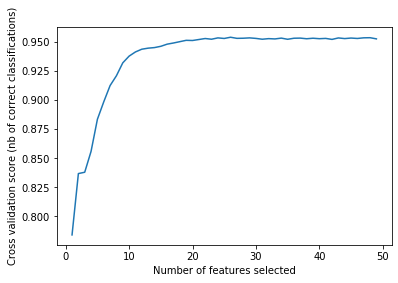

Num Features: 26
Selected Features: [ True  True  True False False  True  True  True  True False  True False
 False False False  True  True  True  True False  True False False  True
 False False  True False False  True False False False  True False  True
  True  True  True  True  True  True False  True False False  True False
 False]
Feature Ranking: [ 1  1  1 17 10  1  1  1  1 22  1  8  7 16 23  1  1  1  1  2  1 11 14  1
 15  9  1 12 20  1  4 19 13  1 18  1  1  1  1  1  1  1  5  1 24 21  1  3
  6]
Grid Scores: [0.784 0.837 0.838 0.856 0.884 0.899 0.913 0.921 0.932 0.938 0.942 0.944
 0.945 0.945 0.946 0.948 0.949 0.95  0.952 0.951 0.952 0.953 0.953 0.954
 0.953 0.954 0.953 0.953 0.954 0.953 0.953 0.953 0.953 0.953 0.952 0.953
 0.953 0.953 0.953 0.953 0.953 0.952 0.954 0.953 0.954 0.953 0.954 0.954
 0.953]


,col,score
1,asn,0.249950
16,similar_domain,0.108339
5,dnssec,0.062269
8,gtld,0.062238
4,dns_updated,0.042566
21,src_link,0.042113
9,host_length,0.039838
0,ahref_link,0.032842
7,favicon_link,0.032600
3,dns_created,0.030567


In [287]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

model = ExtraTreesClassifier(n_estimators=100, verbose=True)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5),
              scoring='accuracy', verbose=True, n_jobs=3)
fit = rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print("Grid Scores: %s" % rfecv.grid_scores_)

scores_23 = pd.DataFrame({'col': cols[fit.support_], 'score': rfecv.estimator_.feature_importances_})
scores_23.sort_values('score', ascending=False)

# Recursive feature elimination CV - RandomForestClassifier

Fitting estimator with 49 features.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 48 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.2s finished


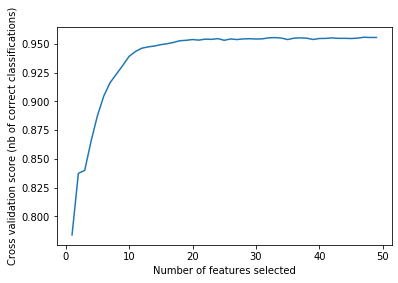

Num Features: 47
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 3 1 1 1 1]
Grid Scores: [0.784 0.837 0.84  0.865 0.887 0.905 0.916 0.924 0.931 0.939 0.944 0.946
 0.948 0.948 0.95  0.95  0.951 0.953 0.953 0.954 0.953 0.954 0.954 0.955
 0.953 0.954 0.954 0.955 0.955 0.954 0.955 0.955 0.956 0.955 0.954 0.955
 0.955 0.955 0.954 0.955 0.955 0.955 0.955 0.955 0.955 0.955 0.956 0.956
 0.956]


,col,score
1,asn,0.225794
32,similar_domain,0.072975
14,gtld,0.050558
37,spec_keywords,0.046274
38,src_link,0.045892
6,dns_updated,0.045800
7,dnssec,0.044493
15,host_length,0.042634
8,domain_count,0.040960
0,ahref_link,0.037613


In [226]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

model = RandomForestClassifier(n_estimators=100, verbose=True)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5),
              scoring='accuracy', verbose=True, n_jobs=3)
fit = rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print("Grid Scores: %s" % rfecv.grid_scores_)

scores_24 = pd.DataFrame({'col': cols[fit.support_], 'score': rfecv.estimator_.feature_importances_})
scores_24.sort_values('score', ascending=False)

# Recursive feature elimination CV - DecisionTreeClassifier

Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 fe

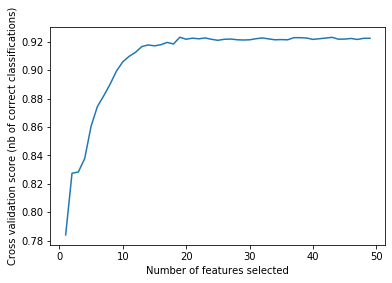

Num Features: 19
Selected Features: [ True  True False False False  True  True  True  True False False False
 False False False  True  True False False False  True False False  True
 False False  True False False  True False False False  True False False
  True False  True  True  True  True False  True False False False False
 False]
Feature Ranking: [ 1  1 17 22 16  1  1  1  1 31  3 18 12 26 23  1  1  5  7 13  1 15 10  1
 24  8  1 14 21  1  4 29 25  1 28  6  1  2  1  1  1  1 19  1 27 30  9 11
 20]
Grid Scores: [0.784 0.827 0.828 0.838 0.86  0.874 0.882 0.89  0.899 0.906 0.91  0.912
 0.916 0.918 0.917 0.918 0.919 0.918 0.923 0.922 0.922 0.922 0.923 0.922
 0.921 0.922 0.922 0.921 0.921 0.921 0.922 0.923 0.922 0.921 0.921 0.921
 0.923 0.923 0.923 0.922 0.922 0.922 0.923 0.922 0.922 0.922 0.922 0.922
 0.922]


,col,score
1,asn,0.400166
12,similar_domain,0.118911
17,ssl_expire,0.064199
15,src_link,0.058154
4,dnssec,0.039449
6,gtld,0.035078
18,url_length,0.030505
0,ahref_link,0.027733
7,host_length,0.026084
9,missleading_link,0.023763


In [227]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(random_state=0)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5),
              scoring='accuracy', verbose=True, n_jobs=3)
fit = rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print("Grid Scores: %s" % rfecv.grid_scores_)

scores_25 = pd.DataFrame({'col': cols[fit.support_], 'score': rfecv.estimator_.feature_importances_})
scores_25.sort_values('score', ascending=False)


# Use only some features with best classifier

In [228]:
scores_23

,col,score
0,ahref_link,0.031632
1,asn,0.243535
2,csp,0.010799
3,disable_rightclick,0.000300
4,dns_a_record,0.001256
5,dns_created,0.037530
6,dns_updated,0.039933
7,dnssec,0.058236
8,domain_count,0.018618
9,extra_https,0.000018


In [239]:
pd.concat([scores_23, scores_24], axis=1, keys='cols')

c                              o          
                    col     score                  col     score
0            ahref_link  0.031632           ahref_link  0.037613
1                   asn  0.243535                  asn  0.225794
2                   csp  0.010799                  csp  0.005145
3    disable_rightclick  0.000300   disable_rightclick  0.000164
4          dns_a_record  0.001256         dns_a_record  0.001057
5           dns_created  0.037530          dns_created  0.035371
6           dns_updated  0.039933          dns_updated  0.045800
7                dnssec  0.058236               dnssec  0.044493
8          domain_count  0.018618         domain_count  0.040960
9           extra_https  0.000018          extra_https  0.000018
10         favicon_link  0.026484         favicon_link  0.022427
11         form_handler  0.003505         form_handler  0.002121
12         four_numbers  0.004451         four_numbers  0.002595
13      fragment_length  0.000267      fragment_length  0.000195
14         google_index  0.000010                 gtld  0.050558
15                 gtld  0.059587          host_length  0.042634
16          host_length  0.034282       hostname_title  0.007240
17       hostname_title  0.013387                 hsts  0.005387
18                 hsts  0.010065           https_used  0.005614
19           https_used  0.008438            input_tag  0.020318
20            input_tag  0.016204     invisible_iframe  0.000714
21     invisible_iframe  0.001283           ip_address  0.000631
22           ip_address  0.000757     missleading_link  0.027030
23     missleading_link  0.017080         non_std_port  0.000297
24         non_std_port  0.000335     old_technologies  0.001160
25     old_technologies  0.001727          path_length  0.033475
26          path_length  0.026105         popup_window  0.001002
27         popup_window  0.001299             punycode  0.000126
28             punycode  0.000137         query_length  0.018783
29         query_length  0.014518             redirect  0.004860
30             redirect  0.008773    rewrite_statusbar  0.000062
31    rewrite_statusbar  0.000137   shortening_service  0.000450
32   shortening_service  0.001545       similar_domain  0.072975
33       similar_domain  0.096883  spec_chars_fragment  0.000122
34  spec_chars_fragment  0.000281      spec_chars_host  0.008679
35      spec_chars_host  0.015434      spec_chars_path  0.020309
36      spec_chars_path  0.021594     spec_chars_query  0.020169
37     spec_chars_query  0.021572        spec_keywords  0.046274
38        spec_keywords  0.028131             src_link  0.045892
39             src_link  0.039454          ssl_created  0.026808
40          ssl_created  0.017367           ssl_expire  0.025397
41           ssl_expire  0.013020          ssl_subject  0.003105
42          ssl_subject  0.005714           url_length  0.033853
43           url_length  0.024124           www_prefix  0.000020
44            user_info  0.000000       x_content_type  0.005398
45           www_prefix  0.000031              x_frame  0.003946
46       x_content_type  0.009904       xss_protection  0.002959
47              x_frame  0.008242                  NaN       NaN
48       xss_protection  0.006016                  NaN       NaN

In [247]:
scores_trees = scores_23.merge(scores_24, on='col', how='outer', suffixes=('_extra_tree', '_rnd_forest'))
scores_trees

,col,score_extra_tree,score_rnd_forest
0,ahref_link,0.031632,0.037613
1,asn,0.243535,0.225794
2,csp,0.010799,0.005145
3,disable_rightclick,0.000300,0.000164
4,dns_a_record,0.001256,0.001057
5,dns_created,0.037530,0.035371
6,dns_updated,0.039933,0.045800
7,dnssec,0.058236,0.044493
8,domain_count,0.018618,0.040960
9,extra_https,0.000018,0.000018


In [267]:
scores_trees.sort_values('score_extra_tree', ascending=False).reset_index(drop=True).reset_index().rename(columns={'index': 'extra_tree'}).sort_values('score_rnd_forest', ascending=False).reset_index(drop=True).reset_index().rename(columns={'index':'random_forest'})

,random_forest,extra_tree,col,score_extra_tree,score_rnd_forest
0,0,0,asn,0.243535,0.225794
1,1,1,similar_domain,0.096883,0.072975
2,2,2,gtld,0.059587,0.050558
3,3,9,spec_keywords,0.028131,0.046274
4,4,5,src_link,0.039454,0.045892
5,5,4,dns_updated,0.039933,0.045800
6,6,3,dnssec,0.058236,0.044493
7,7,7,host_length,0.034282,0.042634
8,8,15,domain_count,0.018618,0.040960
9,9,8,ahref_link,0.031632,0.037613


In [268]:
scores_1
f

,col,score
0,ahref_link,265.736901
1,asn,3121.741069
2,csp,17.513658
3,disable_rightclick,3.218352
4,dns_a_record,44.722698
5,dns_created,1052.032867
6,dns_updated,1048.454459
7,dnssec,1007.085428
8,domain_count,5.170696
9,extra_https,1.986181


In [286]:

for i in range(1, 19):
    s = eval("scores_{}".format(i))
    print(s)
#     s.sort_values('score', ascending=True, inplace=True)



                    col        score
47              x_frame     0.030037
40          ssl_created     0.176071
30             redirect     0.191295
28             punycode     0.326440
24         non_std_port     0.370785
18                 hsts     0.398799
19           https_used     0.405419
41           ssl_expire     0.590961
25     old_technologies     0.666377
48       xss_protection     0.986500
46       x_content_type     1.030488
11         form_handler     1.706866
45           www_prefix     1.779281
9           extra_https     1.986181
14         google_index     1.986181
20            input_tag     2.133319
31    rewrite_statusbar     3.041781
3    disable_rightclick     3.218352
13      fragment_length     3.946570
8          domain_count     5.170696
21     invisible_iframe     5.616700
34  spec_chars_fragment     7.944725
27         popup_window     8.973973
42          ssl_subject     9.094179
43           url_length    12.343477
2                   csp    17.513658
2

,col,score
43,url_length,1
2,csp,1
4,dns_a_record,1
27,popup_window,1
7,dnssec,1
26,path_length,1
8,domain_count,1
10,favicon_link,1
5,dns_created,1
12,four_numbers,1
